<a href="https://colab.research.google.com/github/salarbalou/Fredholm-Integral-of-Second-Kind/blob/main/publication_outline_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 968 kB 5.3 MB/s 
     |████████████████████████████████| 359 kB 57.5 MB/s 
     |████████████████████████████████| 138 kB 44.9 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 3.6 MB 41.7 MB/s 
     |████████████████████████████████| 58 kB 3.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [2]:
baseurl = 'https://scholar.google.com/scholar?as_ylo='
#for number of review papers use: 
char_rev = '&hl=en&as_sdt=0,36&as_rr=1'
#for all publications use: 
char_all = '&hl=en&as_sdt=0,36'

In [3]:
# Year of Publication, and keyword with quotation marks
keys = '"PCR"'

In [4]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021','2022']
nump = []
for year in years:
 wd.get(baseurl+year+'&q='+keys+char_rev)
 content = wd.page_source
 soup = BeautifulSoup(content)
 pubn = soup.findAll('div', {'class':'gs_ab_mdw'})[1].text
 n = re.compile(r'^About+\s([0-9,]+)+\s+results+\s+', re.MULTILINE)
 res = n.findall(pubn); newi = [i.split(',') for i in res]
 base = len(newi[0])
 if (base == 2):
   npub = newi[0][0]+newi[0][1]
 elif (base == 1):
   npub = newi[0][0]
 nump.append(int(npub))

   Number of Publications    Year
0                   69800  2015.0
1                   88000  2016.0
2                   37400  2017.0
3                   24700  2018.0
4                   23600  2019.0
5                   22900  2020.0
6                   19100  2021.0
7                    3510  2022.0
AxesSubplot(0.125,0.125;0.775x0.755)


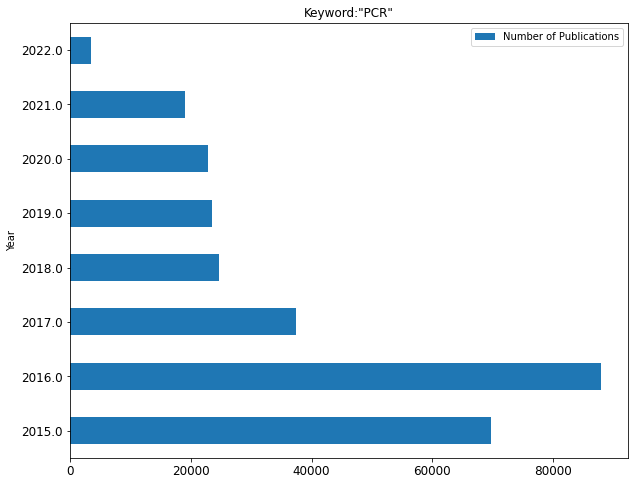

In [6]:
df = pd.DataFrame({'Number of Publications' : nump, 'Year': np.linspace(2015, 2022, 8)})
ax = df.plot(kind = 'barh', x = 'Year', y = 'Number of Publications', figsize = (10, 8), title = f'Keyword:{keys}', fontsize = 12)
print(df)
print(ax)